In [1]:
!pip install scikit-learn


In [2]:
!pip install kagglehub


In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


In [ ]:
from collections import Counter
print(Counter(labels))

Counter({'transmission': 24, 'health_info': 18, 'policy': 8, 'risk': 5, 'testing': 4, 'prevention': 4, 'symptoms': 3, 'general_info': 1})


### LSTM

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from collections import Counter

# Load data
df = pd.read_csv('./COVID19_FAQ.csv')

# Set categories (must match data length)
categories = [
    "transmission", "symptoms", "symptoms", "transmission", "health_info", "health_info",
    "risk", "risk", "risk", "symptoms", "risk", "risk", "health_info", "health_info",
    "health_info", "health_info", "health_info", "health_info", "transmission", "transmission",
    "transmission", "testing", "health_info", "health_info", "transmission", "transmission",
    "transmission", "policy", "health_info", "prevention", "health_info", "policy", "prevention",
    "policy", "policy", "policy", "policy", "policy", "policy", "transmission", "health_info",
    "health_info", "transmission", "health_info", "transmission", "transmission", "transmission",
    "general_info", "health_info", "transmission", "health_info", "testing", "prevention",
    "testing", "testing", "transmission", "transmission", "transmission", "transmission",
    "transmission", "transmission", "prevention", "health_info", "transmission", "transmission",
    "transmission", "transmission"
]

assert len(categories) == len(df), "Mismatch between questions and assigned categories"
df['category'] = categories

# Remove rare classes (e.g., fewer than 3 samples)
label_counts = Counter(df['category'])
df = df[df['category'].map(label_counts) >= 3]

# Extract data
X = df['questions'].tolist()
y = df['category'].tolist()

# Step 1: Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to make them of equal length
max_length = max([len(x) for x in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Convert labels to categorical (one-hot encoding)
categories = list(set(y))
category_dict = {category: i for i, category in enumerate(categories)}
y_train_encoded = [category_dict[cat] for cat in y_train]
y_test_encoded = [category_dict[cat] for cat in y_test]

y_train_cat = to_categorical(y_train_encoded, num_classes=len(categories))
y_test_cat = to_categorical(y_test_encoded, num_classes=len(categories))

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

print("✅ Test Accuracy:", accuracy_score(y_test_encoded, y_pred_classes))
print(classification_report(y_test_encoded, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_classes))

ModuleNotFoundError: No module named 'tensorflow'

### LogisticRegression

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import kagglehub
import pandas as pd
import os

# Loading Dataset
df = pd.read_csv('./COVID19_FAQ.csv')
# print(df.head())

df['category'] = [
    "transmission", "symptoms", "symptoms", "transmission", "health_info", "health_info",
    "safety", "safety", "safety", "symptoms", "safety", "safety", "health_info", "health_info",
    "health_info", "health_info", "health_info", "health_info", "transmission", "transmission",
    "transmission", "testing", "health_info", "health_info", "transmission", "transmission",
    "transmission", "policy", "health_info", "safety", "health_info", "policy", "safety",
    "policy", "policy", "policy", "policy", "policy", "policy", "transmission", "health_info",
    "health_info", "transmission", "health_info", "transmission", "transmission", "transmission",
    "general_info", "health_info", "transmission", "health_info", "testing", "safety",
    "testing", "testing", "transmission", "transmission", "transmission", "transmission",
    "transmission", "transmission", "safety", "health_info", "transmission", "transmission",
    "transmission", "transmission"
]

question = df['questions'].tolist()
categories = df['category'].tolist()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(question, categories, test_size=0.3, random_state=42)

# Vectorize
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train model
clf = LogisticRegression(class_weight='balanced', max_iter=1000 )
clf.fit(X_train_vec, y_train)

# Predict
y_pred = clf.predict(X_test_vec)

# Evaluation
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔍 Accuracy: 0.38095238095238093

📊 Classification Report:
               precision    recall  f1-score   support

 health_info       0.67      0.20      0.31        10
      policy       0.67      1.00      0.80         2
      safety       0.00      0.00      0.00         2
    symptoms       0.25      1.00      0.40         1
     testing       0.00      0.00      0.00         1
transmission       0.38      0.60      0.46         5

    accuracy                           0.38        21
   macro avg       0.33      0.47      0.33        21
weighted avg       0.48      0.38      0.35        21

📉 Confusion Matrix:
 [[2 1 2 2 0 3]
 [0 2 0 0 0 0]
 [0 0 0 1 0 1]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [1 0 1 0 0 3]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### MultinomialNB

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Loading Dataset
df = pd.read_csv('./COVID19_FAQ.csv')

df['category'] = [
    "transmission", "symptoms", "symptoms", "transmission", "health_info", "health_info",
    "risk", "risk", "risk", "symptoms", "risk", "risk", "health_info", "health_info",
    "health_info", "health_info", "health_info", "health_info", "transmission", "transmission",
    "transmission", "testing", "health_info", "health_info", "transmission", "transmission",
    "transmission", "policy", "health_info", "prevention", "health_info", "policy", "prevention",
    "policy", "policy", "policy", "policy", "policy", "policy", "transmission", "health_info",
    "health_info", "transmission", "health_info", "transmission", "transmission", "transmission",
    "general_info", "health_info", "transmission", "health_info", "testing", "prevention",
    "testing", "testing", "transmission", "transmission", "transmission", "transmission",
    "transmission", "transmission", "prevention", "health_info", "transmission", "transmission",
    "transmission", "transmission"
]

# Remove categories with only 1 sample
category_counts = pd.Series(df['category']).value_counts()
valid_categories = category_counts[category_counts > 1].index
df_filtered = df[df['category'].isin(valid_categories)]

question = df_filtered['questions'].tolist()
categories = df_filtered['category'].tolist()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(question, categories, test_size=0.3, random_state=42, stratify=categories)

# Vectorize with n-grams (bigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Using unigrams and bigrams
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Use RandomUnderSampler to balance the dataset (or you could use SMOTE with more balanced classes)
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train_vec, y_train)

# Train model with Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_res, y_train_res)

# Predict
y_pred = clf.predict(X_test_vec)

# Evaluation
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔍 Accuracy: 0.25

📊 Classification Report:
               precision    recall  f1-score   support

 health_info       0.33      0.17      0.22         6
      policy       0.50      0.50      0.50         2
  prevention       0.00      0.00      0.00         1
        risk       0.00      0.00      0.00         2
    symptoms       0.20      1.00      0.33         1
     testing       0.00      0.00      0.00         1
transmission       1.00      0.29      0.44         7

    accuracy                           0.25        20
   macro avg       0.29      0.28      0.21        20
weighted avg       0.51      0.25      0.29        20

📉 Confusion Matrix:
 [[1 1 0 1 1 2 0]
 [0 1 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [2 0 1 1 0 1 2]]


### RandomForest & SVM

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train and X_test are the features (text data) and y_train, y_test are the labels
# Example preprocessing: Vectorize the text using TF-IDF and scaling the features
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Scale the data (if necessary)
scaler = StandardScaler(with_mean=False)
X_train_vec = scaler.fit_transform(X_train_vec)
X_test_vec = scaler.transform(X_test_vec)

# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train_vec, y_train)

# Apply SMOTE to balance the dataset with a reduced k_neighbors
# smote = SMOTE(random_state=42, k_neighbors=1)  # Reduced k_neighbors to avoid error
# X_train_res, y_train_res = smote.fit_resample(X_train_vec, y_train)

# Random Forest hyperparameter tuning with balanced class weights
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'class_weight': ['balanced', None]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=2)
grid_rf.fit(X_train_res, y_train_res)
print("Best parameters for Random Forest:", grid_rf.best_params_)

# SVM hyperparameter tuning with balanced class weights
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced', None]
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=2)
grid_svm.fit(X_train_res, y_train_res)
print("Best parameters for SVM:", grid_svm.best_params_)

# Evaluate the best Random Forest model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_vec)
print("🔍 Random Forest Best Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n📊 Classification Report (Best Random Forest):\n", classification_report(y_test, y_pred_rf))
print("\n📉 Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

# Evaluate the best SVM model
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_vec)
print("🔍 SVM Best Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\n📊 Classification Report (Best SVM):\n", classification_report(y_test, y_pred_svm))
print("\n📉 Confusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))


Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 50}
Best parameters for SVM: {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
🔍 Random Forest Best Model Accuracy: 0.35

📊 Classification Report (Best Random Forest):
               precision    recall  f1-score   support

 health_info       0.29      0.33      0.31         6
      policy       0.00      0.00      0.00         2
  prevention       0.00      0.00      0.00         1
        risk       0.00      0.00      0.00         2
    symptoms       1.00      1.00      1.00         1
     testing       0.00      0.00      0.00         1
transmission       0.44      0.57      0.50         7

    accuracy                           0.35        20
   macro avg       0.25      0.27      0.26        20
weighted avg       0.29      0.35      0.32        20


📉 Confusion Matrix (Random Forest):
 [[2 0 0 1 0 0 3]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [1]:
!pip install scikit-learn 


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Clustering Silhouette Score

Clusters: 2 --> Silhouette Score: 0.1073
Clusters: 3 --> Silhouette Score: 0.0591
Clusters: 4 --> Silhouette Score: 0.0534
Clusters: 5 --> Silhouette Score: 0.0575
Clusters: 6 --> Silhouette Score: 0.0587
Clusters: 7 --> Silhouette Score: 0.0646
Clusters: 8 --> Silhouette Score: 0.0768
Clusters: 9 --> Silhouette Score: 0.0735
Clusters: 10 --> Silhouette Score: 0.0677
Clusters: 11 --> Silhouette Score: 0.0641
Clusters: 12 --> Silhouette Score: 0.0677
Clusters: 13 --> Silhouette Score: 0.0671
Clusters: 14 --> Silhouette Score: 0.0729
Clusters: 15 --> Silhouette Score: 0.0751


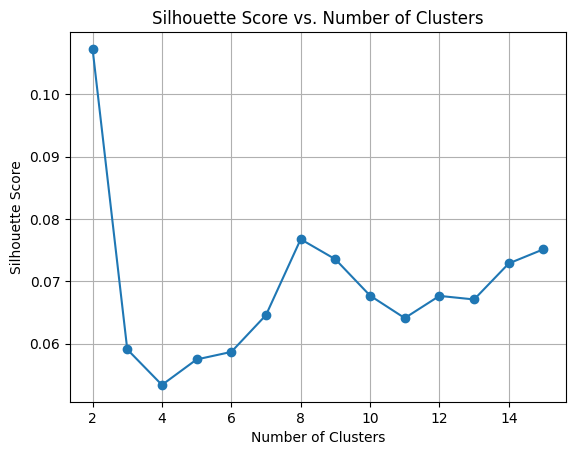

Q: Bagaimana proses pencairan dana beasiswa kepada mahasiswa?" (2x)
A: Setelah dana beasiswa ditransfer ke rekening kampus, bagian keuangan akan mencocokkan data mahasiswa penerima dengan rekening mereka. Selanjutnya, dana akan ditransfer langsung ke rekening masing-masing mahasiswa sesuai dengan jumlah yang telah ditentukan dalam SK. Mahasiswa akan menerima notifikasi bahwa dana telah ditransfer, dan mereka harus menandatangani tanda terima sebagai bukti pencairan beasiswa."
Related Questions:
 - Bagaimana prosedur registrasi mahasiswa lama di PNJ?"
 - Bagaimana prosedur pemberian beasiswa kepada mahasiswa dari pemerintah?"
 - Bagaimana proses seleksi penerima beasiswa?"
 - Bagaimana prosedur pembuatan Surat Keterangan Mendaftar Beasiswa di luar PNJ?"
 - Bagaimana prosedur Pembuatan Surat Keterangan Online Kesalahan Penulisan Ijazah?"
 - Bagaimana prosedur pembuatan Kartu Tanda Mahasiswa (KTM)?"
 - Bagaimana prosedur pembuatan Surat Keterangan Mengurus Visa atau Paspor?"
 - Bagaimana 

In [7]:
import re
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Load cleaned and labeled dataset
df = pd.read_csv('./Dataset_Prosedur_Akademik_labeled.csv', encoding='utf-8-sig')
dfs = pd.read_csv('./Dataset_Prosedur_Akademik_clean.csv', encoding='utf-8-sig')

# Extract questions and answers
questions = df['Question'].tolist()
answers = df['Answer'].tolist()

# Encode questions using Sentence-BERT
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(questions)

# Plot the elbow method to find optimal cluster
# wcss = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(embeddings)
#     wcss.append(kmeans.inertia_)

# plt.plot(range(1, 11), wcss, marker='o')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('WCSS')
# plt.title('Elbow Method')
# plt.show()

# Cluster questions into groups
# num_clusters = min(10, len(questions))  # or choose based on your need
num_clusters = 8 # or choose based on your need
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Group and summarize questions
faq_data = []
for cluster_id in range(num_clusters):
    cluster_qs = [q for i, q in enumerate(questions) if labels[i] == cluster_id]
    cluster_ans = [answers[i] for i, q in enumerate(questions) if labels[i] == cluster_id]

    q_counter = Counter(cluster_qs)
    top_q, freq = q_counter.most_common(1)[0]
    top_a = cluster_ans[cluster_qs.index(top_q)]

    faq_data.append({
        "Cluster": cluster_id,
        "Question": top_q,
        "Answer": top_a,
        "Frequency": freq,
        "Related Questions": list(set(cluster_qs) - {top_q})
    })

# Silhouette Score
range_n_clusters = range(2, 16)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    score = silhouette_score(embeddings, cluster_labels)
    silhouette_scores.append(score)
    print(f"Clusters: {n_clusters} --> Silhouette Score: {score:.4f}")

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Save to CSV
df_faq = pd.DataFrame(faq_data)
df_faq.to_csv('./generated_faq.csv', index=False, encoding='utf-8-sig')

# Preview
for faq in faq_data:
    print(f"Q: {faq['Question']} ({faq['Frequency']}x)")
    print(f"A: {faq['Answer']}")
    if faq['Related Questions']:
        print("Related Questions:")
        for rq in faq['Related Questions']:
            print(f" - {rq}")
    print("-" * 50)

model_data = {
    "kmeans": kmeans,
    "sentence_model_name": "all-MiniLM-L6-v2",
    "num_clusters": num_clusters,
    "faq_data": faq_data  
}

with open("faq_cluster_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

